In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [278]:
sales=pd.read_csv('Advertising.csv')
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [279]:
df=pd.DataFrame(data=sales)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [280]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [281]:
df.shape

(200, 5)

In [282]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [283]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [284]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [285]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [286]:
#as there is no null value

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# visualizing data:

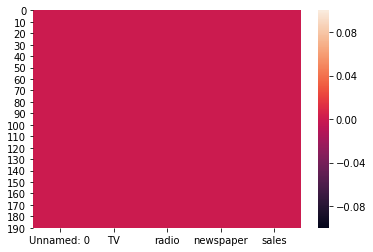

In [288]:
sns.heatmap(df.isnull())

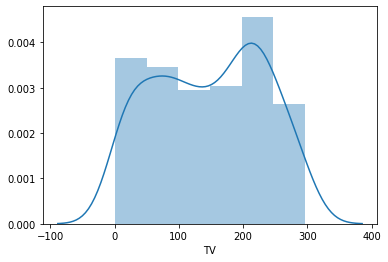

In [289]:
sns.distplot(df['TV'])

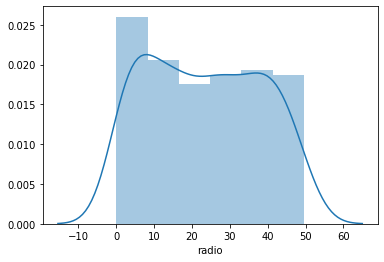

In [290]:
sns.distplot(df['radio'])

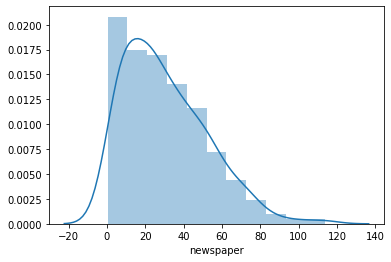

In [291]:
sns.distplot(df['newspaper'])

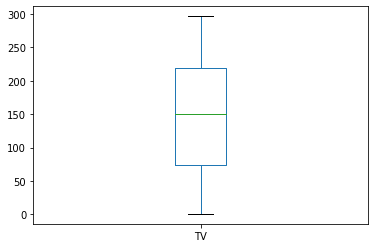

In [292]:
df['TV'].plot.box()

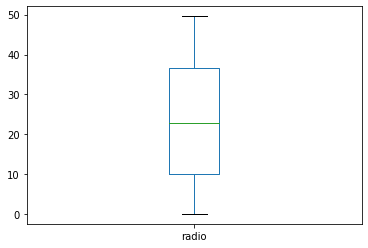

In [293]:
df['radio'].plot.box()

Unnamed: 0       AxesSubplot(0.125,0.536818;0.133621x0.343182)
TV            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
radio          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
newspaper     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
sales         AxesSubplot(0.766379,0.536818;0.133621x0.343182)
dtype: object

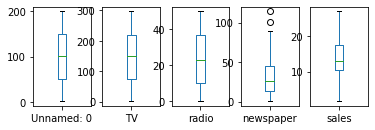

In [294]:
df.plot(kind='box',subplots=True,layout=(2,5))

In [295]:
collist=df.columns.values

In [296]:
ncol=5
nrows=10

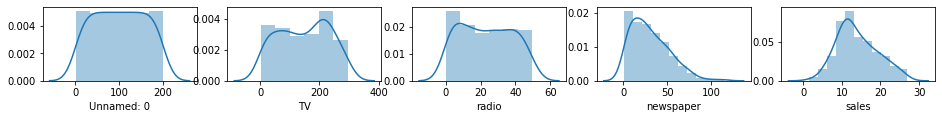

In [297]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

# removing outliers:

In [298]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [299]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


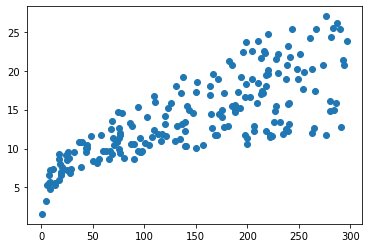

In [300]:
plt.scatter(df['TV'],df['sales'])
plt.show()

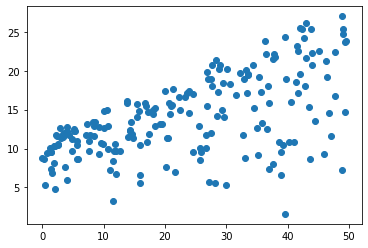

In [301]:
plt.scatter(df['radio'],df['sales'])
plt.show()

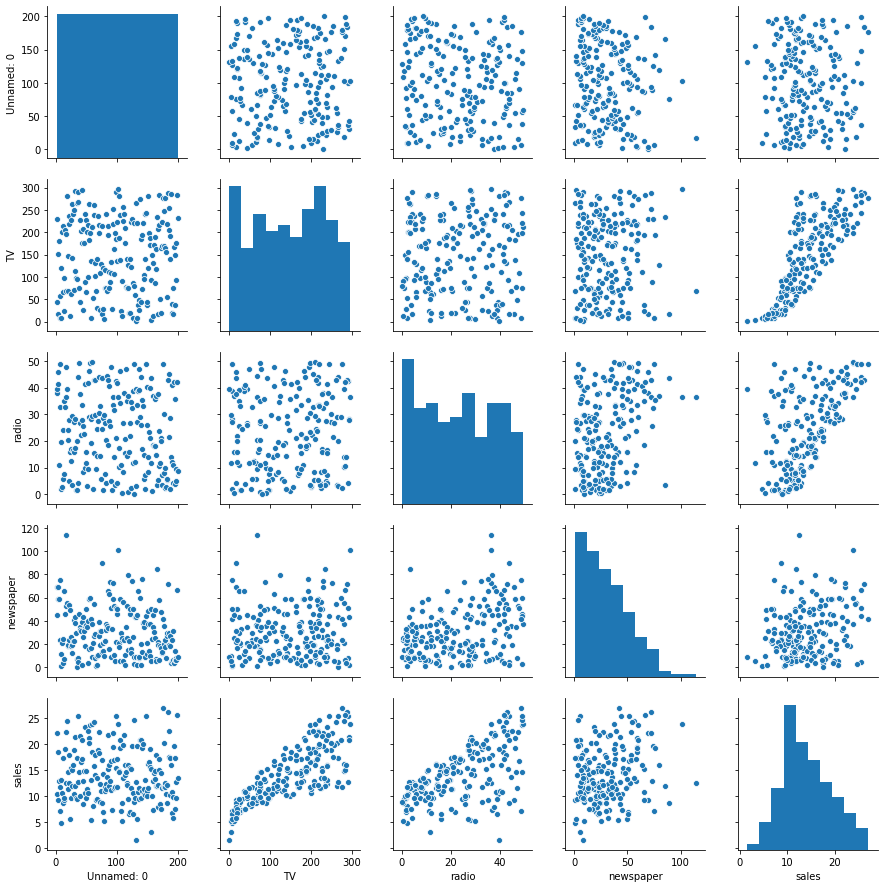

In [302]:
sns.pairplot(df)

# correlation:

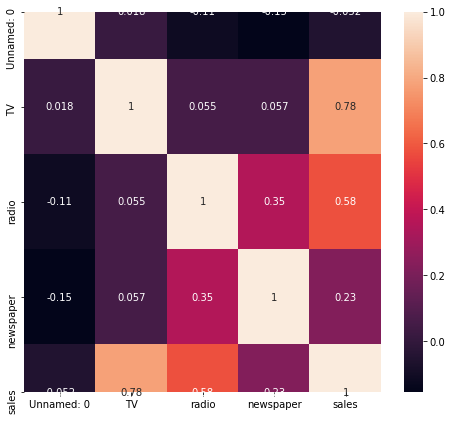

In [303]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [304]:
df_new = pd.DataFrame(df) 

In [305]:
df_new.rename(columns = {'Unnamed: 0':'Sr_no'}, inplace = True)

In [306]:
df_new

,Sr_no,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [307]:
df=df_new
df

,Sr_no,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [308]:
df.drop('Sr_no',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


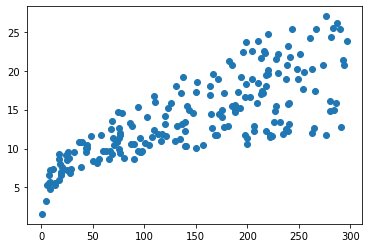

In [309]:
plt.scatter(df['TV'],df['sales'])
plt.show()

In [310]:
df_new=df[(z<3).all(axis=1)]

In [311]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [312]:
df_new.shape

(198, 4)

In [313]:
df.shape

(200, 4)

In [314]:
#so 2 rows are dropped

In [315]:
df=df_new

In [316]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [317]:
df.shape

(198, 4)

In [318]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [319]:
x.shape

(198, 3)

In [320]:
y.shape

(198,)

# now training the model:

In [321]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [323]:
x_train.shape

(132, 3)

In [324]:
y_train.shape

(132,)

In [325]:
x_test.shape

(66, 3)

In [326]:
y_test.shape

(66,)

In [327]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [328]:
lm.coef_

array([ 4.00291346,  2.83436321, -0.0791251 ])

In [329]:
lm.intercept_

13.937098579872337

In [330]:
lm.score(x_train,y_train)

0.8887997343665095

In [334]:
feature_cols = ['TV', 'radio', 'newspaper']

In [335]:
x = df[feature_cols]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [336]:
zip(feature_cols, ls.coef_)

# now testing the model:

In [337]:
#predict the value
pred=lm.predict(x_test)

In [338]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
0,10.6,8.707862
1,11.0,9.786530
2,17.1,17.289553
3,18.4,18.240766
4,15.0,15.005323
...,...,...
61,12.6,12.755152
62,14.2,13.794087
63,9.4,6.424413
64,7.3,4.242588


In [348]:
from sklearn.linear_model import Lasso,Ridge

In [349]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8162620272364838

In [350]:
ls.coef_

array([2.99099901, 1.85617947, 0.        ])

In [351]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8887471338263009

In [352]:
rd.coef_

array([ 3.97230923,  2.81086704, -0.06963487])

In [356]:
from sklearn.linear_model import ElasticNet

In [357]:
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7272880512364317


array([2.31533751, 1.5871917 , 0.        ])

In [358]:
#here ridge performs well

In [359]:
print('error :')
print(mean_squared_error(y_test,pred))

error :
2.449694696977331


In [360]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9057013835489527


In [362]:
#here we r geting r2 score 90%

In [365]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [366]:
rfr.score(x_train,y_train)

0.9946071543385442

In [367]:
rfr=RandomForestRegressor(n_estimators=300,random_state=46)

In [368]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=46, verbose=0,
                      warm_start=False)

In [369]:
rfr.score(x_train,y_train)

0.9964176705906577